## Лабораторную работу выполнила Спасюк Мария, 22ПМИ-1

## Вариант 15: R = 3, C = 0.1, M = 4, k1 = 1, k2 = 2

#1. Дискретизация функции отклика

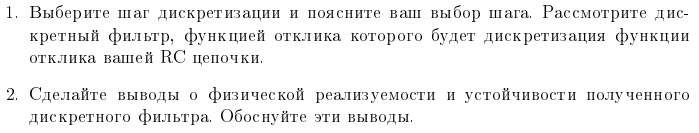

Функция отклика $h(t)$ RC-цепочки:

$$ h(t) = \frac{1}{RC} e^{-\frac{t}{RC}} u(t), $$

где $u(t)$ — единичная ступенчатая функция (функция Хевисайда), где u(t) = 1 при t>=0 и 0 при t<0

Шаг дискретизации $a = 0.03$ допустим, потому что:

1. Теорема Котельникова:

Частота дискретизации $f_s = \frac{1}{a} = 33.33\,\text{Гц}$ значительно выше удвоенной максимальной частоты сигнала ($f_{\text{max}} \approx 0.53\,\text{Гц}$).

2. Согласование с постоянной времени: $a = 0.03\,\text{с}$ в 10 раз меньше постоянной времени системы ($\tau = 0.3\,\text{с}$), что обеспечивает точное описание динамики.

3. Численная устойчивость: Малый шаг гарантирует устойчивость моделирования и минимизирует ошибки.

**Дискретизация**

Заменим непрерывное временя $t$ на дискретные моменты времени $na$, где $a$ — шаг дискретизации.

Дискретная импульсная характеристика $h[n]$ записывается как:
$$ h[n] = h(na) = \frac{1}{RC} e^{-\frac{na}{RC}}, \quad n = 0, 1, 2, \ldots $$






**- Физическая реализуемость:**

 $h(t) = 0$ при $t < 0$, поэтому фильтр физически реализуем.

**- Устойчивость**

Фильтр устойчив, если сумма модулей коэффициентов импульсной характеристики конечна:
$$ \sum_{n=0}^{\infty} |h[n]| = \sum_{n=0}^{\infty} \left| \frac{10}{3} e^{-0.1 n} \right| = \frac{10}{3} \sum_{n=0}^{\infty} e^{-0.1 n} $$

Это сумма бесконечно убывающей геометрической прогрессии с первым членом $a = 1$ и знаменателем $r = e^{-0.1}$:
$$ \sum_{n=0}^{\infty} e^{-0.1 n} = \frac{1}{1 - e^{-0.1}} $$

Таким образом:
$$ \sum_{n=0}^{\infty} |h[n]| = \frac{10}{3} \cdot \frac{1}{1 - e^{-0.1}} < \infty $$

$$ \frac{10}{3} \cdot \frac{1}{1 - e^{-0.1}} \approx 35.0223. $$



Следовательно, фильтр устойчив.

Также об устойчивости фильтра говорит его полюс, вычисленный ниже.

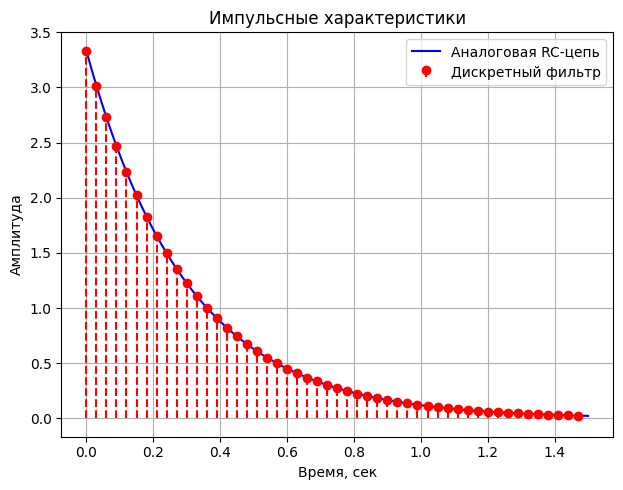

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

R = 3
C = 0.1
tau = R*C
a = 0.03


t = np.linspace(0, 5*tau, 1000)
h_analog = (1/tau) * np.exp(-t/tau)


n = np.arange(0, 50)
h_digital = (1/tau) * (np.exp(-a/tau)**n)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(t, h_analog, 'b-', label='Аналоговая RC-цепь')
plt.stem(n*a, h_digital, linefmt='r--', markerfmt='ro', basefmt=' ', label='Дискретный фильтр')
plt.title('Импульсные характеристики')
plt.xlabel('Время, сек')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

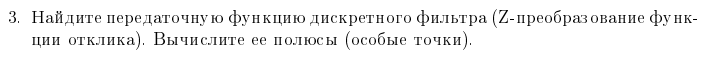

Цифровой фильтр описывается разностным уравнением. Для этого нужно найти передаточную функцию $H(z)$ в z-области. Используем z-преобразование для дискретной  $h[n]$:
$$ H(z) = \sum_{n=0}^{\infty} h[n]z^{-n}. $$

Подставляем $$ h[n] = h(na) = \frac{1}{RC} e^{-\frac{na}{RC}}:$$


$$ H(z) = \frac{1}{RC} \sum_{n=0}^{\infty} (e^{-\frac{a}{RC}} z^{-1})^n. $$

Сумма геометрической прогрессии даёт:
$$ H(z) = \frac{1}{RC} \cdot \frac{1}{1 - e^{-\frac{a}{RC}} z^{-1}} $$


Таким образом, передаточная функция цифрового фильтра:
$$ H(z) = \frac{\frac{1}{RC}}{1 - e^{-\frac{a}{RC}} z^{-1}}. $$

При параметрах R = 3, C = 0.1, $\tau = 0.3$, a = 0.03 передаточная функция будет иметь вид:

$$ H(z) = \frac{10}{3} \sum_{n=0}^{\infty} \left( e^{-\frac{1}{10}} z^{-1} \right)^n = \frac{10}{3} \cdot \frac{1}{1 - e^{-\frac{1}{10}} z^{-1}} = \frac{\frac{10}{3}}{1 - e^{-\frac{1}{10}} z^{-1}}. $$

Полюс передаточной функции находится при знаменателе равном нулю:
$$ 1 - e^{-\frac{1}{10}} z^{-1} = 0 \Rightarrow z = e^{\frac{-1}{10}} $$

Таким образом, полюс передаточной функции находится в точке $z = e^{\frac{-1}{10}}$.

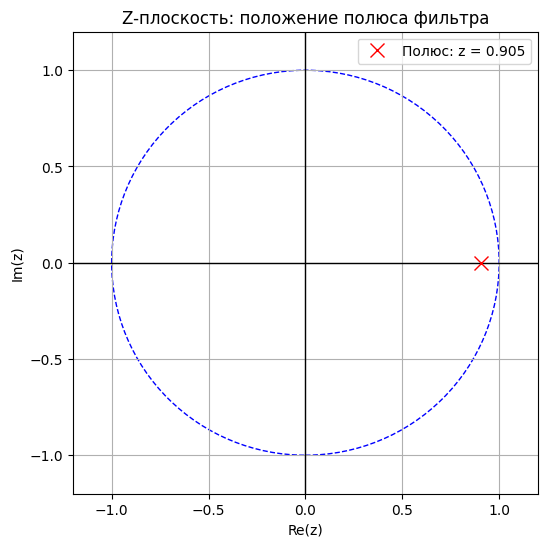

In [114]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

a = 0.03
RC = 0.3
pole = np.exp(-a/RC)

# Построение z-плоскости
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.grid(True)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)

# Единичный круг
circle = Circle((0,0), 1, fill=False, color='blue', linestyle='--')
ax.add_patch(circle)

# Полюс
ax.plot(pole, 0, 'rx', markersize=10, label=f'Полюс: z = {pole:.3f}')
ax.legend()
plt.title('Z-плоскость: положение полюса фильтра')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()

Значение $|z| = 0.905 < 1$, что говорит об устойчивости фильтра

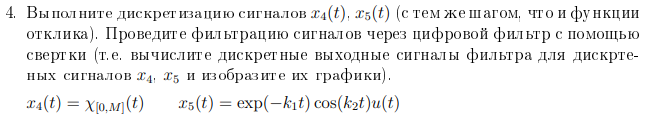

# Дискретизация сигналов

Сигнал $x_4(t) = \chi_{[0,M]}(t)$

Это единичная прямоугольная функция (или ступенчатая функция Хевисайда на интервале $[0, M]$). В дискретной форме она выглядит как:
$$ x_4[n] = \begin{cases}
1 & \text{если } 0 \leq na \leq M \\
0 & \text{иначе}
\end{cases} $$

где $a$ — шаг дискретизации.

Сигнал $x_5(t) = \exp(-k_1 t) \cos(k_2 t) u(t)$

Этот сигнал представляет собой затухающий косинусоидальный импульс. В дискретной форме он будет:
$$ x_5[n] = \exp(-k_1 na) \cos(k_2 na) u(na) $$

где $u(na)$ — единичная ступенчатая функция в дискретном времени.

Фильтрация с помощью свертки

Пусть у нас есть цифровой фильтр с дискретной функцией отклика $h[n]$. Выходной сигнал $y[n]$ для входного сигнала $x[n]$ определяется сверткой:
$$ y[n] = (x * h)[n] = \sum_{k=-\infty}^{\infty} x[k] h[n - k] $$

## Применение к сигналу $x_4[n]$
$$ y_4[n] = \sum_{k=0}^{M/a} x_4[k] h[n - k] $$

## Применение к сигналу $x_5[n]$
$$ y_5[n] = \sum_{k=0}^{\infty} x_5[k] h[n - k] $$

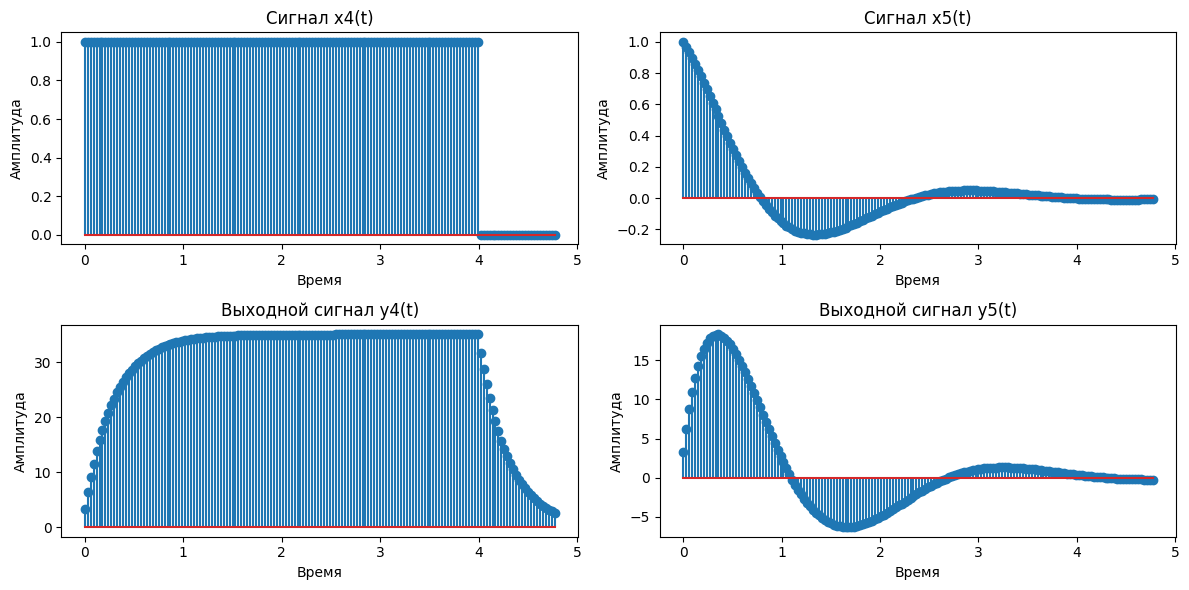

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

M = 4
a = 0.03
k1 = 1
k2 = 2
R = 3
C = 0.1

# Дискретизация сигналов
t = np.arange(0, 1.2*M, a)
x4 = (t >= 0) & (t <= M)
x5 = np.exp(-k1 * t) * np.cos(k2 * t) * (t >= 0)

alpha = np.exp(-a / (R * C))
#h = 1 / (R * C) * (alpha ** np.arange(len(t)))
h = (1/tau) * (np.exp(-t/tau))


y4 = convolve(x4, h, mode='full')[:len(t)]
y5 = convolve(x5, h, mode='full')[:len(t)]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.stem(t, x4)
plt.title('Сигнал x4(t)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(2, 2, 2)
plt.stem(t, x5)
plt.title('Сигнал x5(t)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(2, 2, 3)
plt.stem(t, y4)
plt.title('Выходной сигнал y4(t)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(2, 2, 4)
plt.stem(t, y5)
plt.title('Выходной сигнал y5(t)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

Для сигнала x4 выходной сигнал y4 имеет плавное затухание.

Для экспоненциально затухающего сигнала x5 выходной сигнал y5 демонстрирует экспоненциальное затухание, но с измененной амплитудой и фазой.

Для реализации дискретного фильтра в виде каскада умножителей и линий задержки, основываясь на разностном уравнении, нужно выполнить следующие шаги:

## Разностное уравнение
Передаточная функция $H(z)$ позволяет записать разностное уравнение, связывающее входной сигнал $x[n]$ и выходной сигнал $y[n]$:
$$ Y(z) = H(z) X(z). $$

Подставляем $H(z)$:
$$ Y(z) = \frac{\frac{1}{RC}}{1 - e^{-\frac{a}{RC}} z^{-1}} X(z). $$

Умножаем обе части на знаменатель:
$$ Y(z) \left( 1 - e^{-\frac{a}{RC}} z^{-1} \right) = \frac{1}{RC} X(z). $$

Переходим обратно во временную область:
$$ y[n] - e^{-\frac{a}{RC}} y[n-1] = \frac{1}{RC} x[n]. $$


Разностное уравнение для фильтра:
$$ y[n] = A y[n - 1] + B x[n], $$

где:
- $B = \frac{1}{RC}$,
- $A = e^{-\frac{a}{RC}}$.

Это уравнение описывает рекурсивный процесс, где выходной сигнал $y[n]$ зависит от текущего входного сигнала $x[n]$ и предыдущего значения выходного сигнала $y[n - 1]$.

In [111]:
def cascade_filter(x, a, b):
  y = np.zeros_like(x)
  for n in range (1, len(x)):
    y[n] = a*y[n-1]+b*x[n]
  return y
y4_cascade = cascade_filter(x4, np.exp(-a/tau), 1/tau)
y5_cascade = cascade_filter(x5, np.exp(-a/tau), 1/tau)

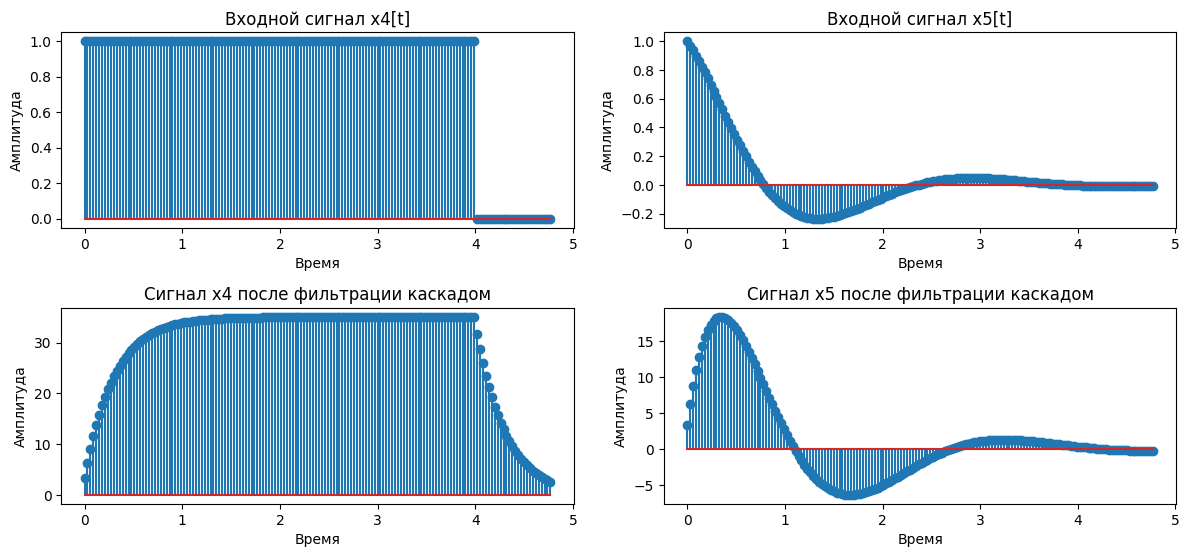

In [117]:
# Графики
plt.figure(figsize=(12, 8))


plt.subplot(3, 2, 1)
plt.stem(t, x4)
plt.title('Входной сигнал x4[t]')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(3, 2, 3)
plt.stem(t, y4)
plt.title('Сигнал х4 после фильтрации каскадом')
plt.xlabel('Время')
plt.ylabel('Амплитуда')


plt.subplot(3, 2, 2)
plt.stem(t, x5)
plt.title('Входной сигнал x5[t]')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(3, 2, 4)
plt.stem(t, y5)
plt.title('Сигнал х5 после фильтрации каскадом')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

Графики сигналов после фильтрации с помощью свертки и с помощью каскада умножения и линии задержки получились схожими.

#2. Замена дифференциального уравнения разностным

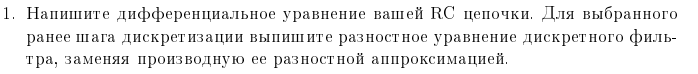

**Дифференциальное уравнение**

Дифференциальное уравнение для RC-цепочки имеет вид:
$$ RC \cdot \frac{dy(t)}{dt} + y(t) = x(t). $$

Подставим параметры $R = 3$ и $C = 0.1$:
$$ 3 \cdot 0.1 \cdot \frac{dy(t)}{dt} + y(t) = x(t), $$
$$ 0.3 \cdot \frac{dy(t)}{dt} + y(t) = x(t). $$

**Аппроксимация производной**

Используем аппроксимацию производной:
$$ \frac{dy(t)}{dt} \approx \frac{y[n] - y[n-1]}{\Delta t}, $$
где $\Delta t = a = 0.03$.

Подставим это в дифференциальное уравнение:
$$ 0.3 \cdot \frac{y[n] - y[n-1]}{0.03} + y[n] = x[n], $$
$$ 10(y[n] - y[n-1]) + y[n] = x[n], $$
$$ 10y[n] - 9y[n-1] = x[n]. $$

Решим это уравнение относительно $y[n]$:
$$ 10 y[n] = 9 y[n-1] + x[n], $$
$$ y[n] = \frac{9}{10} y[n-1] + \frac{1}{10} x[n]. $$

Таким образом, мы получили уравнение в виде:
$$ y[n] = A y[n-1] + B x[n], $$
где:
$$ A = \frac{9}{10}, \quad B = \frac{1}{10}. $$

## Итоговое уравнение

Итак, разностное уравнение для дискретного фильтра, моделирующего RC-цепочку с параметрами $R = 3$, $C = 0.1$ и шагом дискретизации $a = 0.03$, имеет вид:
$$ y[n] = \frac{9}{10} y[n-1] + \frac{1}{10} x[n]. $$

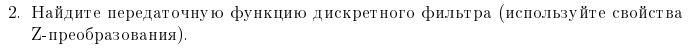

Применим Z-преобразование к обеим сторонам уравнения. Обозначим $Y(z)$ — Z-преобразование выходного сигнала $y[n]$, а $X(z)$ — Z-преобразование входного сигнала $x[n]$.

Z-преобразование линейно, поэтому:
$$ \mathcal{Z}\{y[n]\} = \mathcal{Z}\left\{\frac{9}{10} y[n-1] + \frac{1}{10} x[n]\right\}. $$

Используя свойства Z-преобразования:
$$ Y(z) = \frac{9}{10} z^{-1} Y(z) + \frac{1}{10} X(z). $$

Передаточная функция $H(z)$ определяется как отношение Z-преобразования выходного сигнала к Z-преобразованию входного сигнала:
$$ H(z) = \frac{Y(z)}{X(z)}. $$

Выразим $Y(z)$ через $X(z)$:
\begin{align*}
Y(z) - \frac{9}{10} z^{-1} Y(z) &= \frac{1}{10} X(z), \\
Y(z) \left( 1 - \frac{9}{10} z^{-1} \right) &= \frac{1}{10} X(z), \\
Y(z) &= \frac{\frac{1}{10} X(z)}{1 - \frac{9}{10} z^{-1}}.
\end{align*}

Теперь найдём передаточную функцию:
$$ H(z) = \frac{Y(z)}{X(z)} = \frac{\frac{1}{10}}{1 - \frac{9}{10} z^{-1}}. $$

Упростим выражение:
$$ H(z) = \frac{\frac{1}{10}}{1 - \frac{9}{10} z^{-1}} = \frac{1}{10 - 9z^{-1}}. $$

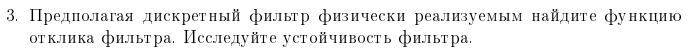

Функция отклика $h[n]$ фильтра может быть найдена как обратное Z-преобразование передаточной функции $H(z)$.

Имеем передаточную функцию:
$$ H(z) = \frac{1}{10 - 9z^{-1}}. $$

Разложим её в ряд:
$$ H(z) = \frac{1}{10} \cdot \frac{1}{1 - \frac{9}{10} z^{-1}}. $$

Используя формулу для суммы геометрической прогрессии:
$$ \frac{1}{1 - A} = \sum_{n=0}^{\infty} A^n, \quad |a| < 1, $$
где $A = \frac{9}{10} z^{-1}$:
$$ H(z) = \frac{1}{10} \sum_{n=0}^{\infty} \left( \frac{9}{10} z^{-1} \right)^n. $$

Таким образом,
$$ H(z) = \frac{1}{10} \sum_{n=0}^{\infty} \left( \frac{9}{10} \right)^n z^{-n}. $$

Обратное Z-преобразование даёт:
$$ h[n] = \mathcal{Z}^{-1}\{H(z)\} = \frac{1}{10} \left( \frac{9}{10} \right)^n u[n], $$
где $u[n]$ — единичная ступенчатая функция (равна 1 при $n \geq 0$ и 0 при $n < 0$).

Таким образом, функция отклика имеет вид:
$$ h[n] = \frac{1}{10} \left( \frac{9}{10} \right)^n u[n]. $$

## Устойчивость фильтра

Для исследования устойчивости фильтра проверим условие:
$$ \sum_{n=-\infty}^{\infty} |h[n]| < \infty. $$

Подставим $h[n]$:
$$ \sum_{n=0}^{\infty} \left| \frac{1}{10} \left( \frac{9}{10} \right)^n \right| = \frac{1}{10} \sum_{n=0}^{\infty} \left( \frac{9}{10} \right)^n. $$

Это сумма геометрической прогрессии с первым членом $a = 1$ и знаменателем $r = \frac{9}{10}$:
$$ \sum_{n=0}^{\infty} \left( \frac{9}{10} \right)^n = \frac{1}{1 - \frac{9}{10}} = 10. $$

Таким образом,
$$ \frac{1}{10} \sum_{n=0}^{\infty} \left( \frac{9}{10} \right)^n = \frac{1}{10} \cdot 10 = 1 < \infty. $$

Следовательно, сумма конечна, и фильтр является устойчивым.

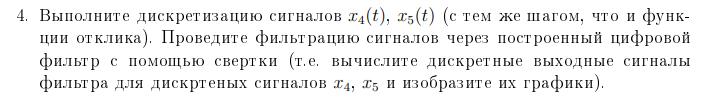

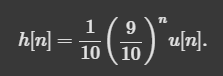

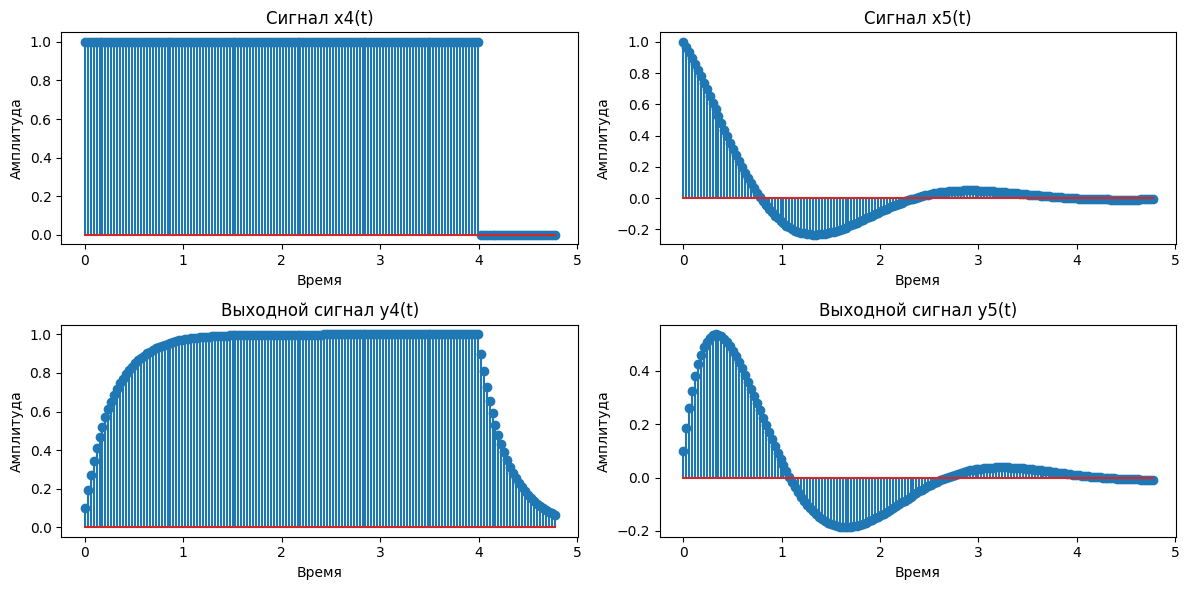

In [109]:
#Будем использовать функцию convolve из библиотеки numpy
import numpy as np
import matplotlib.pyplot as plt

M = 4
a = 0.03
k1 = 1
k2 = 2
R = 3
C = 0.1


t = np.arange(0, 1.2*M, a)
x4 = (t >= 0) & (t <= M)
x5 = np.exp(-k1 * t) * np.cos(k2 * t) * (t >= 0)

h = 0.1*(0.9**np.arange(len(t)))


y4 = np.convolve(x4, h, mode='full')[:len(t)]
y5 = np.convolve(x5, h, mode='full')[:len(t)]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.stem(t, x4)
plt.title('Сигнал x4(t)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(2, 2, 2)
plt.stem(t, x5)
plt.title('Сигнал x5(t)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(2, 2, 3)
plt.stem(t, y4)
plt.title('Выходной сигнал y4(t)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(2, 2, 4)
plt.stem(t, y5)
plt.title('Выходной сигнал y5(t)')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

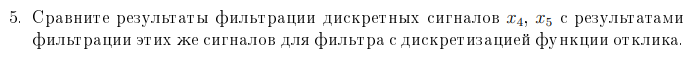

Графики сигналов x4 и x5 после фильтрации с помощью свертки похожи на графики этих же сигналов после фильтрации в пункте 1.4, однако есть различия в амплитудах, которые могут быть вызваны тем, что в переходе от дифференциального уравнения к разностному мы заменяли производную на ее разностную аппроксимацию.